# Data Loading


Import library yang akan digunakan

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Menginstal kaggle untuk mendownload dataset

In [107]:
!pip install kaggle

Mendownload data, dari https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

In [108]:
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
student-performance-multiple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


unzip data

In [109]:
import zipfile
zip = '/content/student-performance-multiple-linear-regression.zip'
zip_ref = zipfile.ZipFile(zip, 'r')
zip_ref.extractall()
zip_ref.close()

Membaca file csv yang telah diunzip

In [110]:
# loading dataset
dir = './Student_Performance.csv'
dataframe = pd.read_csv(dir)
dataframe.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Exploratory Data Analysis


Overview jenis data pada setiap kolom dataframe

In [111]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Overview nilai-nilai statistik pada setiap kolom dataframe

In [112]:
dataframe.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Klasifikasi setiap kolom dataframe sebagai fitur kategorikal atau numerik

In [113]:
num_features = []
categorical_features = []
for data in dataframe:
    if dataframe[data].dtype == 'object':
        categorical_features.append(data)
    else:
        num_features.append(data)

Hubungan fitur kategori dengan Performance Index.

Diperoleh bahwa fitur jenis ini memiliki pengaruh rendah terhadap Performance Index.

<ipython-input-114-167fd467c4a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Performance Index", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataframe, palette="Set3")


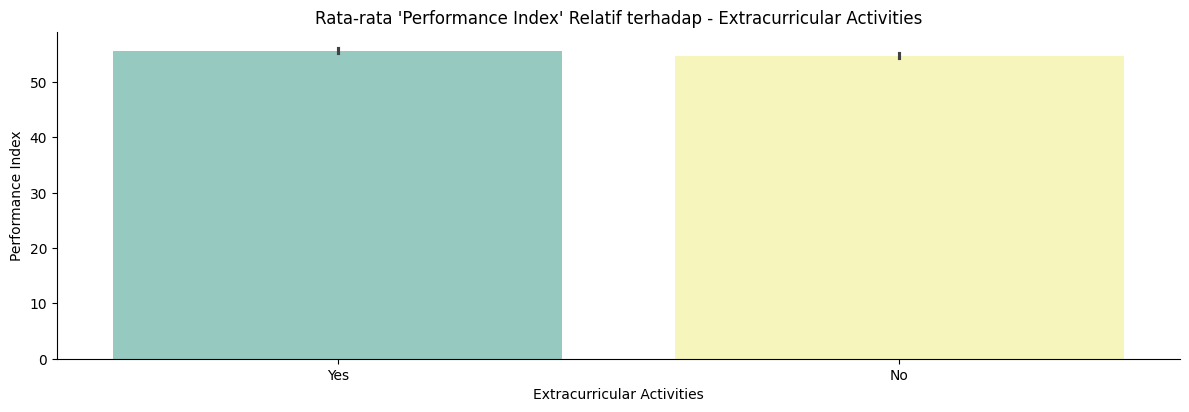

In [114]:
for col in categorical_features:
  sns.catplot(x=col, y="Performance Index", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataframe, palette="Set3")
  plt.title("Rata-rata 'Performance Index' Relatif terhadap - {}".format(col))

Hubungan antar fitur numerik

Diperoleh fitur Previous Score memiliki pengaruh besar terhadap Performance Index.

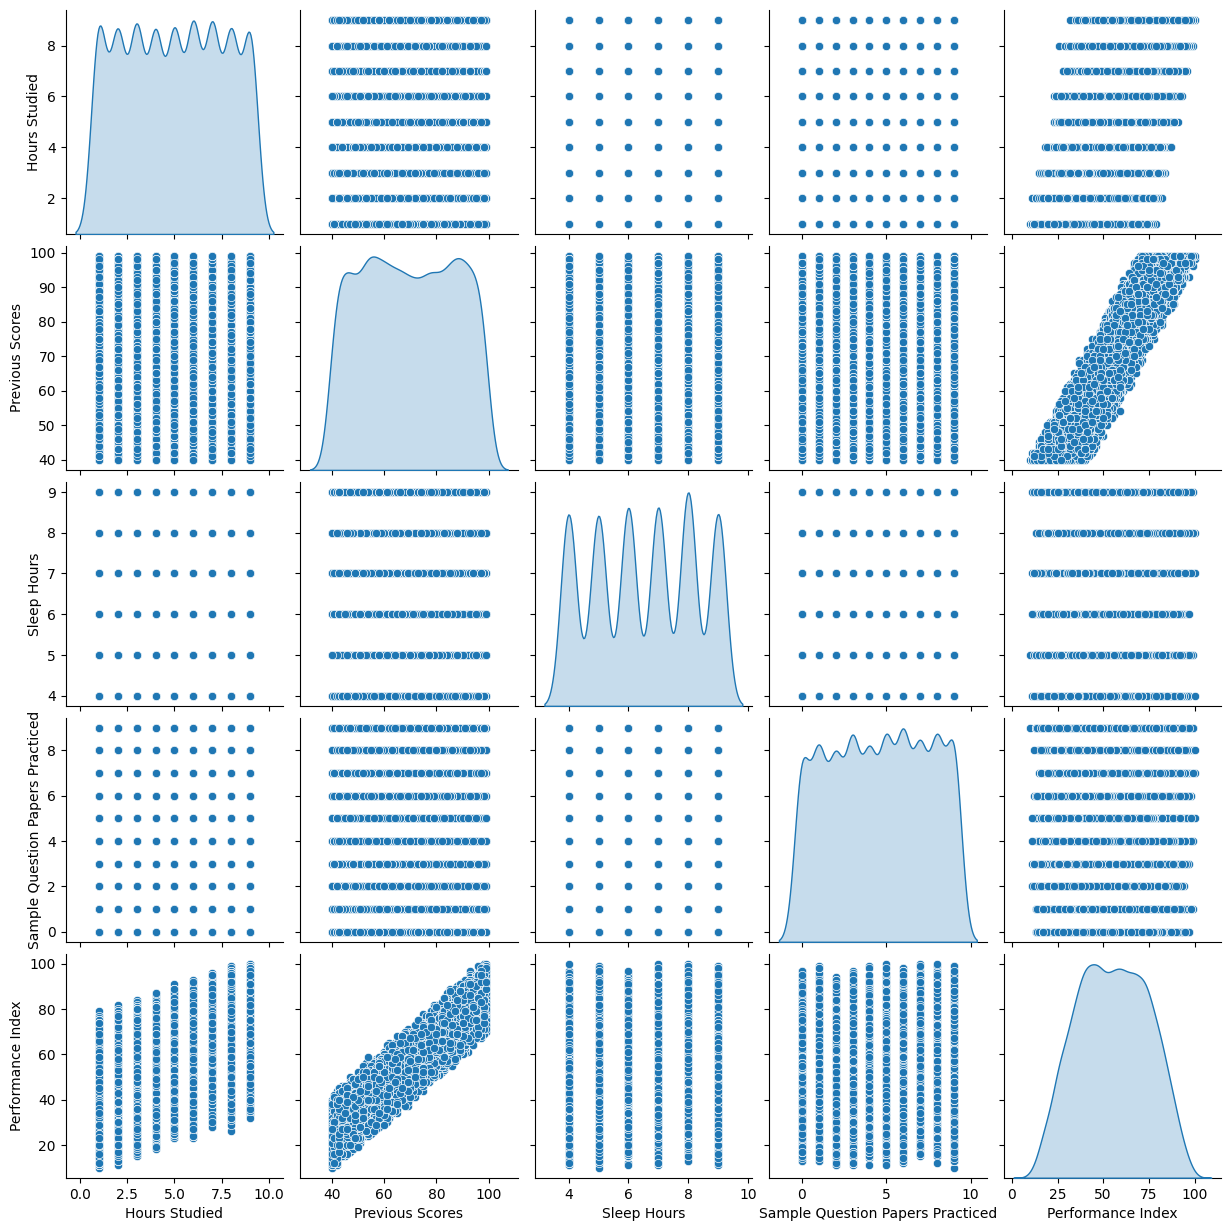

<Figure size 1000x800 with 0 Axes>

In [115]:
sns.pairplot(dataframe[num_features], diag_kind = 'kde')
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = dataframe[num_features].corr().round(2)

Matriks korelasi antar fitur numerik

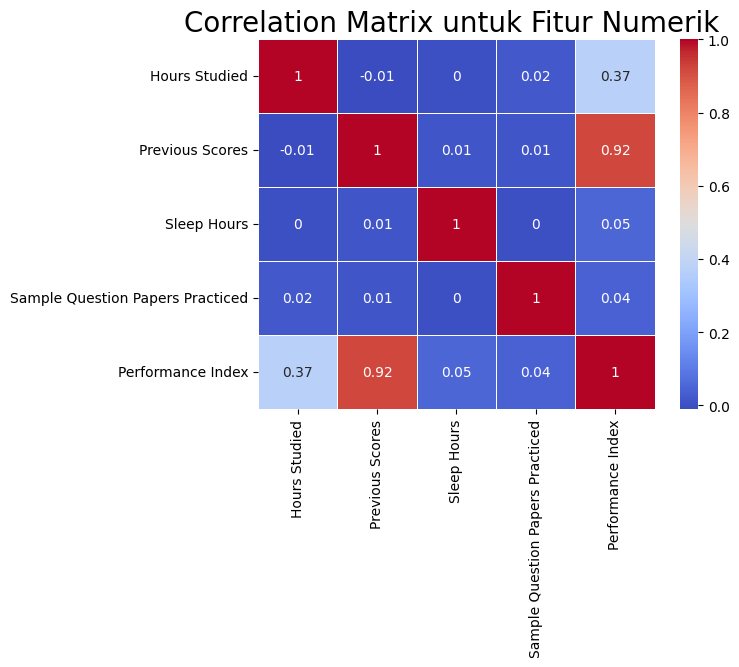

In [116]:
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

# Data Preparation

Encoding fitur kategori Extracurricular Activities

In [117]:
from sklearn.preprocessing import  OneHotEncoder
dataframe = pd.concat([dataframe, pd.get_dummies(dataframe['Extracurricular Activities'], prefix='Extracurricular Activities')],axis=1)
dataframe.drop(['Extracurricular Activities'], axis=1, inplace=True)
dataframe.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,False,True
1,4,82,4,2,65.0,True,False
2,8,51,7,2,45.0,False,True
3,5,52,5,2,36.0,False,True
4,7,75,8,5,66.0,True,False


Pembagian data menjadi training set dan test set

In [118]:
from sklearn.model_selection import train_test_split

X = dataframe.drop(["Performance Index"],axis =1)
y = dataframe["Performance Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

Jumlah sampel pada dataset setelah pembagian

In [119]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 10000
Total # of sample in train dataset: 8000
Total # of sample in test dataset: 2000


Standardisasi fitur numerik

In [120]:
from sklearn.preprocessing import StandardScaler
num_features = num_features[:-1]
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train.loc[:, num_features])
X_train[num_features].head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
9216,0.386860,0.605526,0.858488,-0.207499
7324,1.158169,0.893286,0.269221,0.489829
918,0.772514,-0.833274,-1.498579,-0.207499
5902,-0.384449,1.181046,0.858488,0.141165
2807,-1.155759,0.835734,-1.498579,-1.253490


Mengecek mean dan std data setelah standardisasi

In [121]:
X_train[num_features].describe().round(4)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,8000.0000,8000.0000,8000.0000,8000.0000
mean,-0.0000,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001
min,-1.5414,-1.6966,-1.4986,-1.6022
25%,-0.7701,-0.8908,-0.9093,-0.9048
50%,0.0012,-0.0275,0.2692,0.1412
75%,0.7725,0.8933,0.8585,0.8385
max,1.5438,1.6990,1.4478,1.5358


# Model Development


Persiapan dataframe

In [122]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Model K-Nearest

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Model Random Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Model Boosting Algorithm

In [125]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.1, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi model

Scaling fitur numerik

In [126]:
X_test.loc[:, num_features] = scaler.transform(X_test[num_features])

Evaluasi MSE model

In [127]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e4
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e4
mse

,train,test
KNN,0.000679,0.000874
RF,0.000094,0.000591
Boosting,0.002073,0.002088


Plot MSE setiap model pada train dan test set

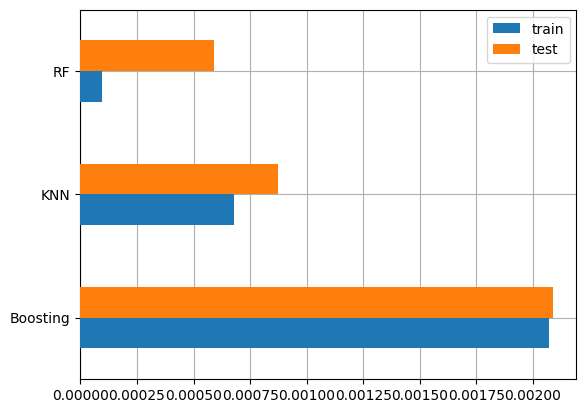

In [128]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Diperoleh bahwa model RF memberikan error terkecil sehingga dipilih sebagai model untuk melakukan prediksi performa siswa.

In [129]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
2656,82.0,85.3,81.6,81.4


Diperoleh bahwa model Random Forest memberikan hasil prediksi paling mendekati dengan nilai asli.